### Importing Libraries

In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Loading Dataset 

In [389]:
dataframe = pd.read_csv(r'F:\DS projects\HackerRank_Project1\Dataset\Train.csv')
test_data = pd.read_csv(r'F:\DS projects\HackerRank_Project1\Dataset\Test.csv')

In [390]:
dataframe.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [391]:
test_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [392]:
test_data.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

#### Shape , Info and how many columns are present in the dataset

In [393]:
dataframe.shape

(7000, 24)

In [394]:
dataframe.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [395]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

### Checking for Outliers

In [396]:
#Get all numerical variable
def getNumericData(dataset):
    numeric_var = [key for key in dict(dataset.dtypes)
                   if dict(dataset.dtypes)[key]
                       in ['float64','float32','int32','int64']]
    return numeric_var


#Get all Categorical Variable
def getCategorical(dataset):
    cat_var = [key for key in dict(dataset.dtypes)
          if dict(dataset.dtypes)[key] in ['object']]
    
    return cat_var

In [397]:
getNumericData(dataframe)

['Age',
 'Education_Level',
 'Time_of_service',
 'Time_since_promotion',
 'growth_rate',
 'Travel_Rate',
 'Post_Level',
 'Pay_Scale',
 'Work_Life_balance',
 'VAR1',
 'VAR2',
 'VAR3',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7',
 'Attrition_rate']

In [398]:
numeric_data.isnull().sum()

Age                     412
Education_Level           0
Time_of_service         144
Time_since_promotion      0
growth_rate               0
Travel_Rate               0
Post_Level                0
Pay_Scale                 9
Work_Life_balance        11
VAR1                      0
VAR2                    577
VAR3                      0
VAR4                    656
VAR5                      0
VAR6                      0
VAR7                      0
Attrition_rate            0
dtype: int64

In [399]:
numeric_data.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.0
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.0
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.0
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.0
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.0
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.0
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.0
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.0


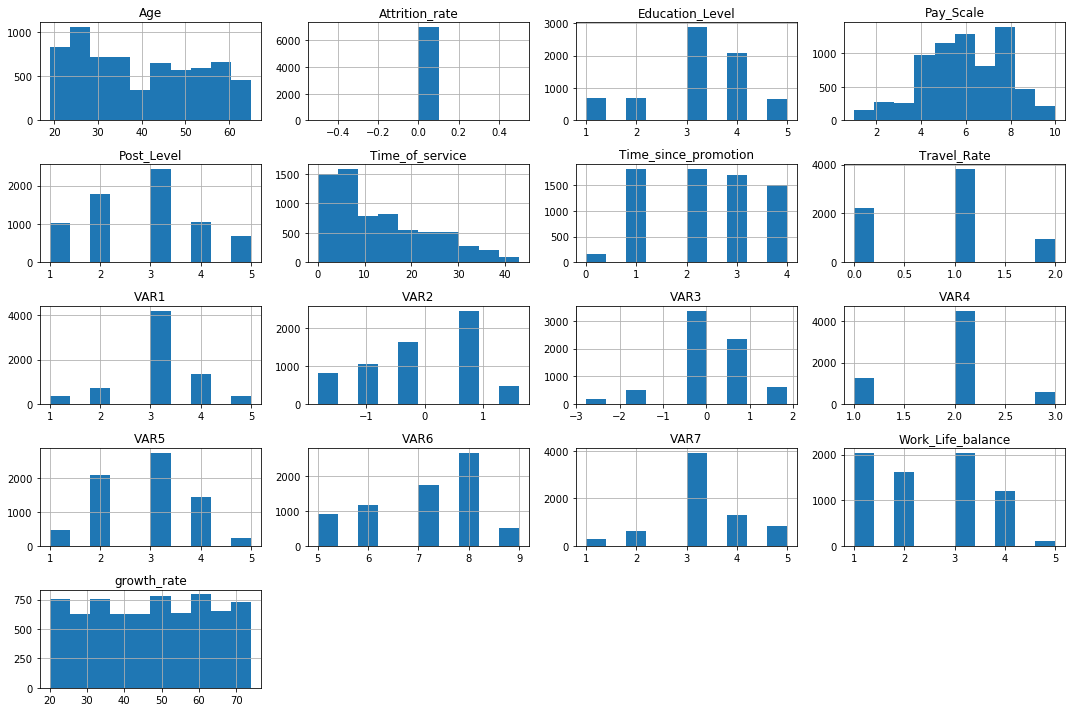

In [400]:
numeric_data.hist(figsize=(15,10));
plt.tight_layout()

Text(0, 0.5, 'Attrition_rate')

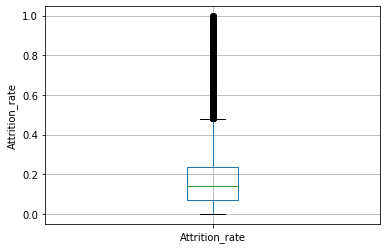

In [401]:
fig = dataframe.boxplot(column='Attrition_rate')
fig.set_title('')
fig.set_ylabel('Attrition_rate')

In [402]:
# 25%, 50% and 75% in the output below indicate the
# 25th quantile, median and 75th quantile respectively

dataframe.Attrition_rate.describe()

count    7000.000000
mean        0.189376
std         0.185753
min         0.000000
25%         0.070400
50%         0.142650
75%         0.235000
max         0.995900
Name: Attrition_rate, dtype: float64

#### Checking for the outliers in VAR4 and VAR2

In [403]:
# Let's calculate the upper and lower boundaries
# to identify outliers according
# to interquantile proximity rule

IQR1 = dataframe.VAR4.quantile(0.75) - dataframe.VAR4.quantile(0.25)

Lower_fence1 = dataframe.VAR4.quantile(0.25) - (IQR * 1.5)
Upper_fence1 = dataframe.VAR4.quantile(0.75) + (IQR * 1.5)


IQR2 = dataframe.VAR4.quantile(0.75) - dataframe.VAR4.quantile(0.25)

Lower_fence2 = dataframe.VAR4.quantile(0.25) - (IQR * 1.5)
Upper_fence2 = dataframe.VAR4.quantile(0.75) + (IQR * 1.5)

print("VAR2",Upper_fence2, Lower_fence2, IQR2)
print("VAR4",Upper_fence1, Lower_fence1, IQR1)

VAR2 2.0 2.0 0.0
VAR4 2.0 2.0 0.0


In [404]:
# And if we are looking at really extreme values
# using the interquantile proximity rule

IQR = dataframe.VAR4.quantile(0.75) - dataframe.VAR4.quantile(0.25)

Lower_fence = dataframe.VAR4.quantile(0.25) - (IQR * 3)
Upper_fence = dataframe.VAR4.quantile(0.75) + (IQR * 3)


IQR2 = dataframe.VAR4.quantile(0.75) - dataframe.VAR4.quantile(0.25)

Lower_fence2 = dataframe.VAR4.quantile(0.25) - (IQR * 3)
Upper_fence2 = dataframe.VAR4.quantile(0.75) + (IQR * 3)


print("VAR2",Upper_fence2, Lower_fence2, IQR2)
print("VAR4",Upper_fence, Lower_fence, IQR)

VAR2 2.0 2.0 0.0
VAR4 2.0 2.0 0.0


### Checking Missing Values

In [405]:
def missing_percentage(df): 
    
    missing_total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([missing_total, percent], axis=1, keys=['Missing_Total','Percent'])

In [406]:
missing_percentage(dataframe)

,Missing_Total,Percent
VAR4,656,9.37
VAR2,577,8.24
Age,412,5.89
Time_of_service,144,2.06
Work_Life_balance,11,0.16
Pay_Scale,9,0.13


I knowingly took VAR2 and VAR4 for outlier test because it has highest number of missing value.

VAR4 contains 9 %, VAR2 contains 8% and Age contains 5% of missing data. For simplicity,rest will be drop

In [407]:
dataframe['VAR4'] = dataframe['VAR4'].fillna(0)
dataframe['VAR2'] = dataframe['VAR2'].fillna(0)
dataframe['Age'] = dataframe['Age'].fillna(0)

# I have done this because, these columns are filled with some other variables which was a bit difficult to drop the columns
dataframe['Time_of_service'] = dataframe['Time_of_service'].fillna("NA")
dataframe['Work_Life_balance'] = dataframe['Work_Life_balance'].fillna("NA")
dataframe['Pay_Scale'] = dataframe['Pay_Scale'].fillna("NA")

#### so there are less missing value which we can easliy remove

In [408]:
dataframe.dropna(how = 'all', inplace=True)

In [409]:
missing_percentage(dataframe)

,Missing_Total,Percent


### Perfect!

### Observations so far :

Dataset is a mix of string and integer values.

First we will check the Multi-collinearity between them so that it will be eay for us to decide to drop the missing value
or fill it.

In [410]:
correlation = dataframe[['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate']].corr()

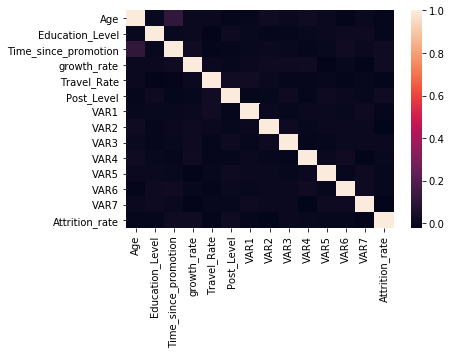

In [411]:
sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns)

#### So there is no correlation between the features of this dataset

In [412]:
getCategorical(dataframe)

['Employee_ID',
 'Gender',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Time_of_service',
 'Pay_Scale',
 'Compensation_and_Benefits',
 'Work_Life_balance']

#### There are some category which are unnecessary lets remove it

In [413]:
dataframe.drop(['Employee_ID', 'Hometown'], axis = 1, inplace = True)

In [414]:
dataframe.head()

,Gender,Age,Education_Level,Relationship_Status,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,IT,Conceptual,4,4,33,1,...,type2,3,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,M,24.0,3,Single,Logistics,Analytical,5,4,36,0,...,type2,4,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,F,58.0,3,Married,Quality,Conceptual,27,3,51,0,...,type2,1,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,F,26.0,3,Single,Human Resource Management,Behavioral,4,3,56,1,...,type2,1,3,-1.8176,-0.4537,0.0,3,7,3,0.0668
4,F,31.0,1,Married,Logistics,Conceptual,5,4,62,1,...,type3,3,1,0.7516,-0.4537,2.0,2,8,2,0.1827


### Lets Encode Categorical data

In [415]:
# one hot encoding

data_prep = pd.get_dummies(dataframe, drop_first=True)
print("Shape ", data_prep.shape)

Shape  (7000, 93)


### Split the data to Train and Test set
### Evaluate RMSE 

In [416]:
y = data_prep[['Attrition_rate']]
x = data_prep.drop(['Attrition_rate'], axis = 1)

#Creating training set of 70%
tr_size = 0.7 * len(x)
tr_size = int(tr_size)

X_train = x.values[0 : tr_size]
X_test = x.values[tr_size : len(x)]

Y_train = y.values[0 : tr_size]
Y_test = y.values[tr_size : len(y)]


std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

r2_train = std_reg.score(X_train, Y_train)
r2_test = std_reg.score(X_test, Y_test)

# Create Y predict
Y_predict = std_reg.predict(X_test)

rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))

In [417]:
print("Root Mean Square Error- ", rmse)

Root Mean Square Error-  0.1942509667115685


### Lets work on Test Dataset

In [418]:
missing_percentage(test_data)

,Missing_Total,Percent
VAR4,298,9.93
VAR2,217,7.23
Age,161,5.37
Time_of_service,52,1.73
Work_Life_balance,5,0.17
Pay_Scale,3,0.10


In [419]:
test_data['VAR4'] = test_data['VAR4'].fillna(0)
test_data['VAR2'] = test_data['VAR2'].fillna(0)
test_data['Age'] = test_data['Age'].fillna(0)

# I have done this because, these columns are filled with some other variables which was a bit difficult to drop the columns
test_data['Time_of_service'] = test_data['Time_of_service'].fillna("NA")
test_data['Work_Life_balance'] = test_data['Work_Life_balance'].fillna("NA")
test_data['Pay_Scale'] = test_data['Pay_Scale'].fillna("NA")

In [420]:
test_data.dropna(how = 'all', inplace=True)
missing_percentage(test_data)

,Missing_Total,Percent


In [421]:
employee_id = pd.DataFrame(test_data['Employee_ID'])
test_data.drop(['Employee_ID', 'Hometown'], axis = 1, inplace = True)
test_data.head()

,Gender,Age,Education_Level,Relationship_Status,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,F,32.0,5,Single,R&D,Conceptual,7,4,30,1,...,4,type2,1,3,-0.9612,-0.4537,2.0,1,8,4
1,M,65.0,2,Single,IT,Directive,41,2,72,1,...,1,type2,1,4,-0.9612,0.7075,1.0,2,8,2
2,M,52.0,3,Married,Sales,Directive,21,3,25,0,...,8,type3,1,4,-0.1048,0.7075,2.0,1,9,3
3,M,50.0,5,Single,Marketing,Analytical,11,4,28,1,...,2,type0,4,3,-0.1048,0.7075,2.0,2,8,3
4,F,44.0,3,Married,R&D,Conceptual,12,4,47,1,...,2,type2,4,4,1.6081,0.7075,2.0,2,7,4


In [422]:
# one hot encoding

data_prep_test = pd.get_dummies(test_data, drop_first=True)
print("Shape ", data_prep_test.shape)

Shape  (3000, 92)


In [430]:
Y_test_predict = pd.DataFrame(std_reg.predict(data_prep_test), columns=['Attrition_rate'])

In [431]:
employee_id

,Employee_ID
0,EID_22713
1,EID_9658
2,EID_22203
3,EID_7652
4,EID_6516
...,...
2995,EID_22547
2996,EID_10066
2997,EID_7126
2998,EID_4929


In [432]:
df_submission = pd.merge(employee_id, Y_test_predict, left_index=True, right_index=True)

print(df_submission)

     Employee_ID  Attrition_rate
0      EID_22713        0.207877
1       EID_9658        0.116650
2      EID_22203        0.197686
3       EID_7652        0.249347
4       EID_6516        0.226190
...          ...             ...
2995   EID_22547        0.206863
2996   EID_10066        0.161614
2997    EID_7126        0.144629
2998    EID_4929        0.109381
2999   EID_24750        0.211072

[3000 rows x 2 columns]


In [434]:
df_submission.to_csv("Submission.csv", index = False)